In [1]:
import pandas as pd
import seaborn as sb
import matplotlib as mpl
import matplotlib.pyplot as plt
from mapboxgl.viz import *
from mapboxgl.utils import *
from mapboxgl.utils import df_to_geojson
from mapboxgl.utils import create_color_stops,create_radius_stops
from haversine import haversine
from tqdm.notebook import tqdm

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

font_path = "C:/Windows/Fonts/gulim.ttc"
font_name = mpl.font_manager.FontProperties(fname=font_path).get_name()

In [4]:
raw_data = pd.read_csv("D:/☆디지털혁신팀/☆실거래가 분석/☆데이터/☆미가공 데이터/미가공 데이터_청주시 공장.csv", encoding="euc-kr", index_col=0)

In [5]:
data = raw_data

In [7]:
data.sample()

,순번,회사명,공장대표주소,종업원수,생산품,업종명,비 고,경도,위도,상태
No,,,,,,,,,,
504,504,(주)성신산전,충청북도 청주시 청원구 오창읍 가좌리 177-1번지 외 1 필지,21,고압차단기 변전외함,"전기회로 개폐, 보호장치 제조업 외 1 종",,127.378727,36.734912,정좌표


In [14]:
data = data[["회사명", "공장대표주소", "종업원수", "경도", "위도"]]
feature = "종업원수"

geo_data = df_to_geojson(df=data, lat="위도", lon="경도")

token = "pk.eyJ1Ijoicm14enphbmciLCJhIjoiY2s3N2ZyNGZnMDZucDNmcjE0aDQ3dGhseiJ9.BsOXweuBOnwYDbR4BXNguQ"

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 68,
 70,
 71,
 72,
 73,
 74,
 75,
 77,
 78,
 80,
 81,
 82,
 83,
 85,
 86,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 99,
 100,
 101,
 102,
 103,
 105,
 106,
 107,
 110,
 111,
 112,
 113,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 126,
 127,
 129,
 130,
 133,
 140,
 143,
 146,
 149,
 150,
 151,
 159,
 160,
 163,
 164,
 165,
 169,
 171,
 173,
 178,
 185,
 186,
 189,
 190,
 197,
 200,
 202,
 210,
 215,
 216,
 217,
 219,
 220,
 226,
 229,
 230,
 231,
 240,
 250,
 256,
 262,
 263,
 270,
 289,
 290,
 300,
 310,
 314,
 324,
 329,
 330,
 340,
 364,
 381,
 441,
 450,
 480,
 516,
 519,
 555,
 557,
 599,
 718,
 968,
 1010,
 1086,
 1310,
 1335,
 1903,
 1904,
 2210,
 337

C:\Users\5CG7092POZ\Anaconda3\envs\tf2.0\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\5CG7092POZ\Anaconda3\envs\tf2.0\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\5CG7092POZ\Anaconda3\envs\tf2.0\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\5CG7092POZ\Anaconda3\envs\tf2.0\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\5CG7092POZ\Anaconda3\envs\tf2.0\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\5CG7092POZ\Anaconda3\envs\tf2.0\lib\si

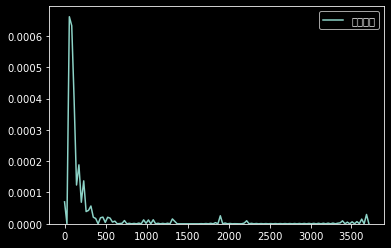

In [18]:
plt.style.use("dark_background")

sb.kdeplot(data[feature])

set(data[feature])

In [19]:
mn = int(data[feature].min())
mx = int(data[feature].max())
interv = int((mx - mn)/10*1.3)

radius_stops = create_radius_stops(list(range(mn, mx+1, interv)), 2, 15)
color_stops = create_color_stops(list(range(mn, mx+1, interv)), colors="RdYlBu")

viz = GraduatedCircleViz(data=geo_data, access_token=token, center=(127.48, 36.63), zoom=11.1, color_property=feature, color_stops=color_stops, radius_default=4, scale=True, add_snapshot_links=True, stroke_color="black", stroke_width=0.5, opacity=0.6, below_layer="waterway-label")

viz.style = "mapbox://styles/mapbox/outdoors-v11"

viz.show()

C:\Users\5CG7092POZ\Anaconda3\envs\tf2.0\lib\site-packages\IPython\core\display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [20]:
with open(f"D:/☆디지털혁신팀/☆실거래가 분석/☆그래프/{feature}.html", "w") as f:
    f.write(viz.create_html())